In [2]:
import mne
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, "../")

import numpy as np
import sklearn 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [217]:
test_array1 = np.array([
    [
        [0.26111974, 0.11957309, 0.43789041, 0.55195784, 0.97879488, 0.83779525, 0.07103316, 0.81555373, 0.36047692, 0.66969672],
        [0.11829872, 0.62208729, 0.12151144, 0.32322608, 0.44766568, 0.0323966 , 0.76488111, 0.07487533, 0.82784653, 0.37208741],
        [0.5033692 , 0.16038897, 0.09936772, 0.29666902, 0.3360312 , 0.34863003, 0.72854015, 0.83873312, 0.25435971, 0.08693761]
    ],
    [
        [0.38421345, 0.49942186, 0.41772645, 0.03361629, 0.18607743, 0.37995606, 0.21219648, 0.78744083, 0.0665138 , 0.17364709],
        [0.63520808, 0.50146566, 0.24332333, 0.416911  , 0.13598271, 0.5124143 , 0.04742027, 0.47287047, 0.75041656, 0.33090511],
        [0.34674857, 0.08750803, 0.65606886, 0.32547634, 0.25072709, 0.16015015, 0.51599662, 0.59102638, 0.63720241, 0.33404092]
    ]
])

test_array2 = np.array([
    [
        [0.57965089, 0.29916159, 0.35521318, 0.2930398 , 0.6483106 , 0.90166643, 0.44092214, 0.50703967, 0.70500445, 0.91224249],
        [0.13162408, 0.28735049, 0.69911551, 0.41296966, 0.66942191, 0.69976527, 0.34452862, 0.84794716, 0.97983843, 0.28600163],
        [0.24674453, 0.70940375, 0.02885952, 0.10646374, 0.36437221, 0.75170579, 0.1624664 , 0.03181097, 0.7024308 , 0.11282568]
    ],
    [
        [0.07849996, 0.25977042, 0.3464731 , 0.15034551, 0.88047936, 0.47573029, 0.53619827, 0.78627646, 0.70335713, 0.30268204],
        [0.97300716, 0.25922066, 0.58895484, 0.54183666, 0.25967079, 0.01464898, 0.83229046, 0.12944266, 0.7471341 , 0.70549887],
        [0.81321716, 0.68124635, 0.05122895, 0.64878736, 0.71678243, 0.17946902, 0.12789457, 0.71866144, 0.99653348, 0.23818069]
    ]
])


In [238]:
def generate_AUC_ROC(epoch_standard, epoch_deviant, window_length=3, stepsize=1):
    
    #epoch_standard_data = epoch_standard.get_data()
    epoch_standard_data = test_array1
    #epoch_deviant_data = epoch_deviant.get_data()
    epoch_deviant_data = test_array2

    length = len(epoch_standard_data[0,0])
    number_of_channels = len(epoch_standard_data[0,:,0])

    AUC_time_curve = []

    for sample_index in range(0, length - window_length + 1, stepsize):
        standard_data = epoch_standard_data[:, :, sample_index]
        deviant_data = epoch_deviant_data[:, :, sample_index]

        for i in range(1,window_length):
            standard_data = np.concatenate((standard_data, epoch_standard_data[:, :, sample_index + i]))
            deviant_data = np.concatenate((deviant_data, epoch_deviant_data[:, :, sample_index + i]))
        
        data = np.concatenate((standard_data, deviant_data))
        classification = np.concatenate(([0 for _ in range(len(standard_data))], [1 for _ in range(len(deviant_data))]))

        # LDA
        lda = LDA()
        lda.fit(data, classification)
        w = lda.coef_.T

        y = data.dot(w).T[0]

        # AUC
        AUC_value = sklearn.metrics.roc_auc_score(classification, y)

        AUC_time_curve.append(AUC_value)
    
    return AUC_time_curve

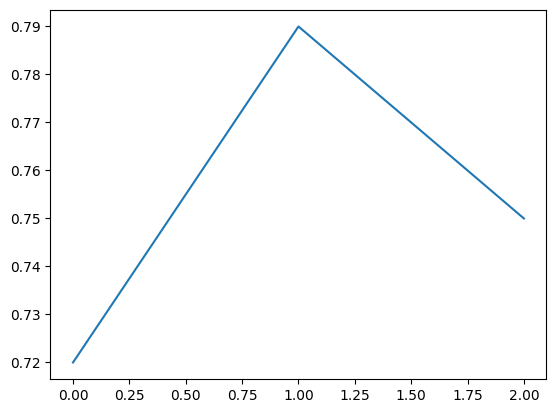

In [239]:
AUC_time_curve = generate_AUC_ROC(0,0, window_length=5, stepsize=2)
plt.plot(AUC_time_curve)
plt.show()